In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

Linear regression

In [4]:
Xtrain = np.arange(0,1,0.01).reshape(-1, 1)
ytrain = 10*Xtrain + np.random.normal(0.0,1.0,100).reshape(-1, 1)
model = LinearRegression().fit(Xtrain.reshape(-1, 1), ytrain.reshape(-1, 1))
print(model.intercept_, model.coef_)


[-0.05284939] [[10.06155534]]


Plotting model predictions

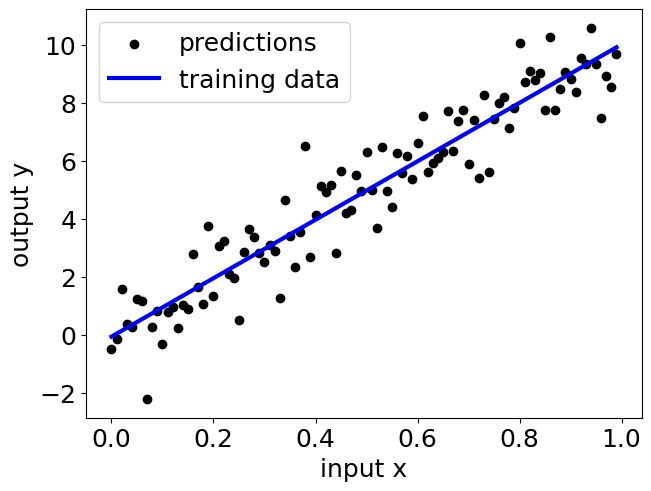

In [5]:
ypred = model.predict(Xtrain)
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='black')
plt.plot(Xtrain, ypred, color='blue', linewidth=3)
plt.xlabel('input x'); plt.ylabel('output y')
plt.legend(['predictions','training data'])
plt.show()

Logistic regression

In [6]:
Xtrain = np.random.uniform(0,1,100)
ytrain = np.sign(Xtrain-0.5)
Xtrain = Xtrain.reshape(-1, 1)
model = LogisticRegression(penalty='none',solver='lbfgs')
model.fit(Xtrain, ytrain)
print("intercept %f, slope %f"%(model.intercept_, model.coef_))

intercept -235.707471, slope 474.224933


Plotting predictions

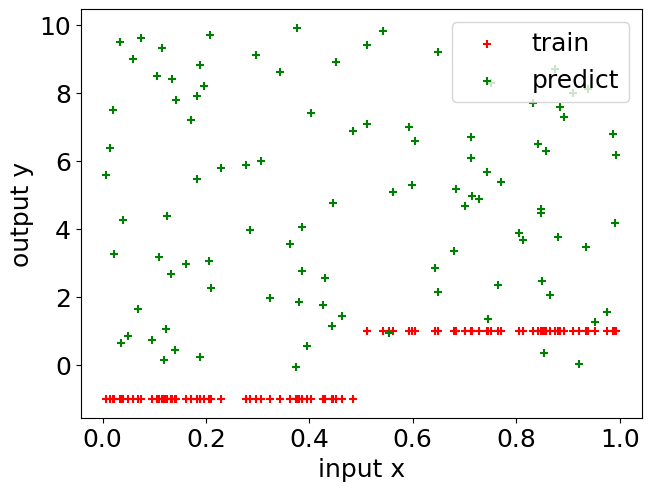

In [7]:
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.scatter(Xtrain, ypred, color='green', marker='+')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["train","predict"])
plt.show()

Logistic regression

In [8]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
print("intercept %f, slope %f"%(model.intercept_, model.coef_))

intercept -1.815705, slope 3.574069


Hold-Out Method

In [9]:
from sklearn.metrics import mean_squared_error  # Import mean_squared_error
X = np.arange(0,1,0.05).reshape(-1, 1)
y = 10*X + np.random.normal(0.0,1.0,X.size).reshape(-1, 1)
for i in range(5):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
    model = LinearRegression().fit(Xtrain, ytrain)
    ypred = model.predict(Xtest)
    print("intercept %f, slope %f, square error %f"%(model.intercept_, model.coef_, mean_squared_error(ytest,ypred)))

intercept -0.635445, slope 11.152123, square error 0.795552
intercept -0.974523, slope 11.804446, square error 0.390175
intercept -0.829064, slope 11.324586, square error 0.345554
intercept -0.388212, slope 10.834259, square error 1.375399
intercept -1.035409, slope 11.584872, square error 1.026632


sklearnk-Fold Cross-validation

In [10]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    model = LinearRegression().fit(X[train], y[train])
    ypred = model.predict(X[test]) 
    print("intercept %f, slope %f, square error %f"%(model.intercept_, model.coef_,mean_squared_error(y[test],ypred)))

[-2.26255843 -1.37675894 -0.24007907 -1.24363351 -1.97385796]
Accuracy: -1.42 (+/− 0.70)
intercept -1.783698, slope 12.893444, square error 2.262558
intercept -0.350932, slope 10.959645, square error 1.376759
intercept -0.869498, slope 11.456287, square error 0.240079
intercept -0.833235, slope 11.880832, square error 1.243634
intercept -0.474621, slope 10.273253, square error 1.973858


Tuning Model Hyperparameters

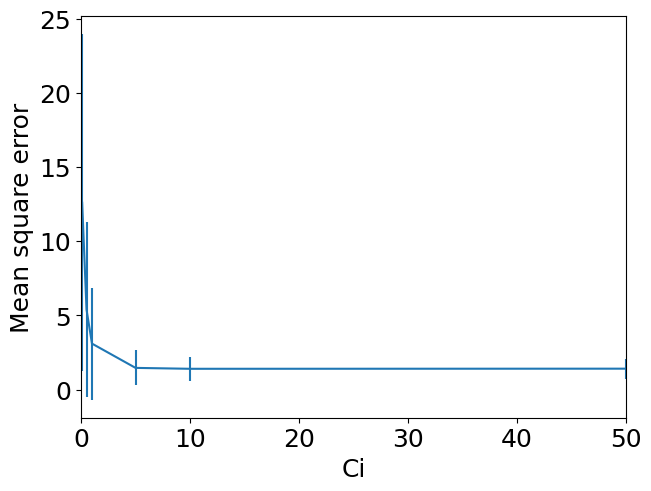

In [11]:
mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
    from sklearn.linear_model import Ridge
    model = Ridge(alpha=1/(2*Ci))
    temp=[]
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(Ci_range,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.xlim((0,50))
plt.show()

Tuning Model Hyperparameters

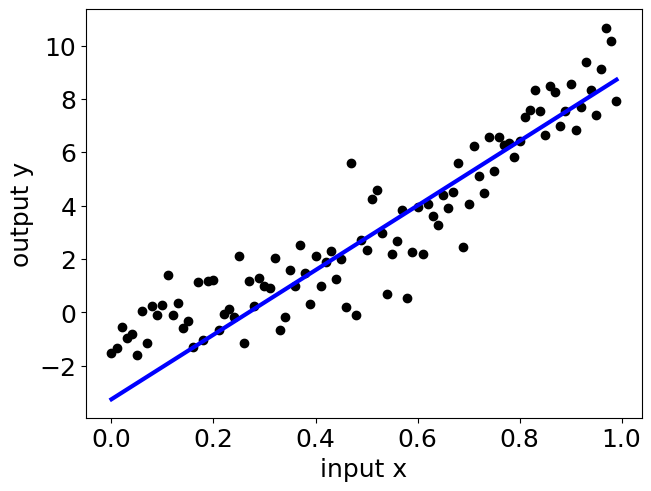

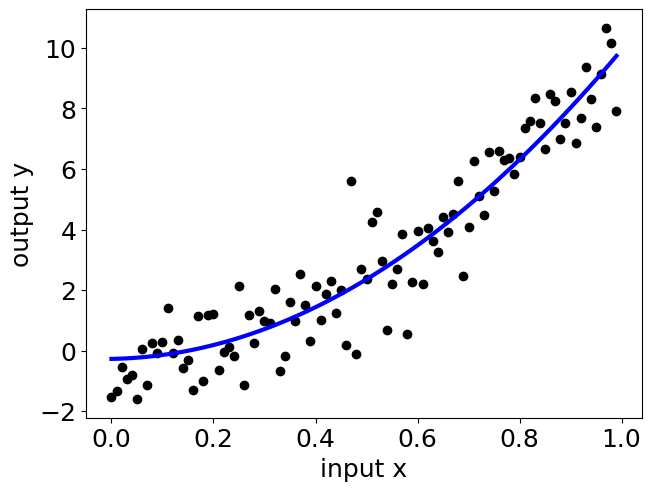

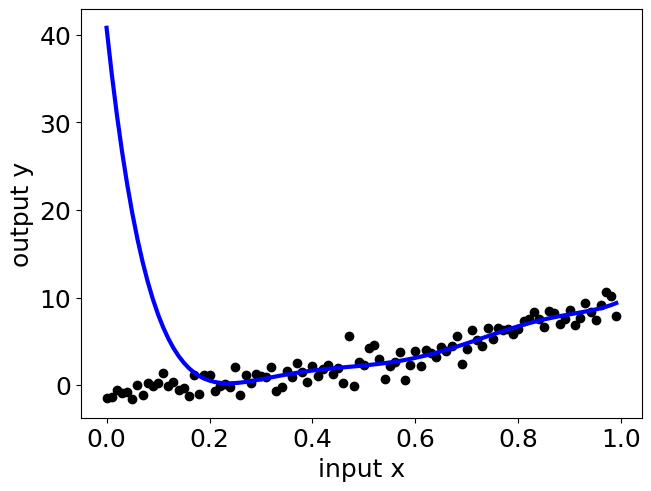

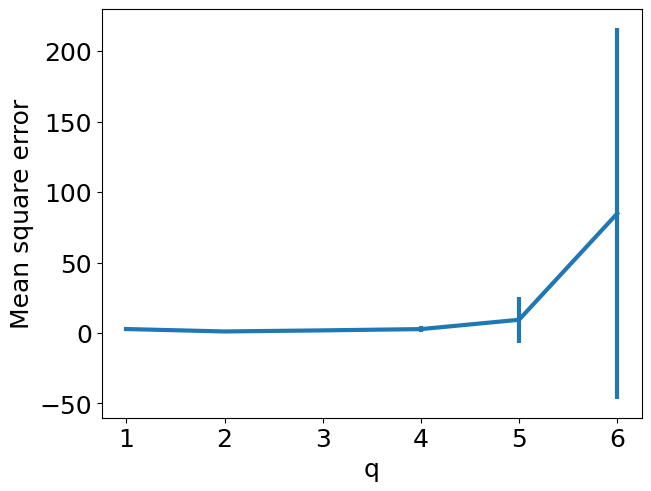

In [12]:
X = np.arange(0,1,0.01).reshape(-1, 1)
y = 10*(X**2) + np.random.normal(0.0,1.0,X.size).reshape(-1, 1)
kf = KFold(n_splits=5)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
mean_error=[]; std_error=[]
q_range = [1,2,3,4,5,6]
for q in q_range:
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    model = LinearRegression()
    temp=[]; plotted = False
    for train, test in kf.split(Xpoly):
        model.fit(Xpoly[train], y[train])
        ypred = model.predict(Xpoly[test])
        temp.append(mean_squared_error(y[test],ypred))
        if ((q==1) or (q==2) or (q==6)) and not plotted:
            plt.scatter(X, y, color='black')
            ypred = model.predict(Xpoly)
            plt.plot(X, ypred, color='blue', linewidth=3)
            plt.xlabel("input x"); plt.ylabel("output y")
            plt.show()
            plotted = True
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(q_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('q')
plt.ylabel('Mean square error')
plt.show()

Python Code For Baseline Predictor Gaussian Noise Example

square error 0.763799 0.861099


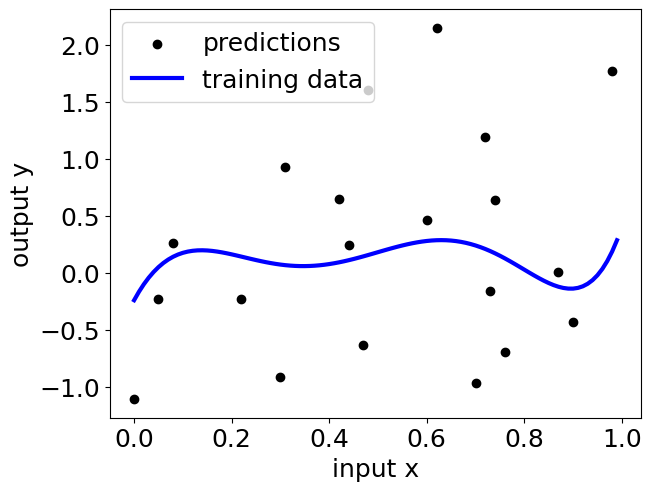

In [13]:
X = np.arange(0,1,0.01).reshape(-1, 1)
y = np.random.normal(0.0,1.0,X.size).reshape(-1, 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

Xtrain_poly = PolynomialFeatures(6).fit_transform(Xtrain)
Xtest_poly = PolynomialFeatures(6).fit_transform(Xtest)
X_poly = PolynomialFeatures(6).fit_transform(X)

model = LinearRegression().fit(Xtrain_poly, ytrain)

ypred = model.predict(Xtest_poly)

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean").fit(Xtrain_poly, ytrain)
ydummy = dummy.predict(Xtest_poly)

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtest, ytest, color='black')
ypred = model.predict(X_poly)
plt.plot(X, ypred, color='blue', linewidth=3)
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predictions","training data"])
plt.show()

Movie Review Example

Confusion Matrix for LinearSVC:
[[10  2]
 [ 7  1]]
Classification Report for LinearSVC:
              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.33      0.12      0.18         8

    accuracy                           0.55        20
   macro avg       0.46      0.48      0.44        20
weighted avg       0.49      0.55      0.49        20

Confusion Matrix for DummyClassifier:
[[12  0]
 [ 8  0]]
Classification Report for DummyClassifier:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       1.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.80      0.50      0.37        20
weighted avg       0.76      0.60      0.45        20



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, in

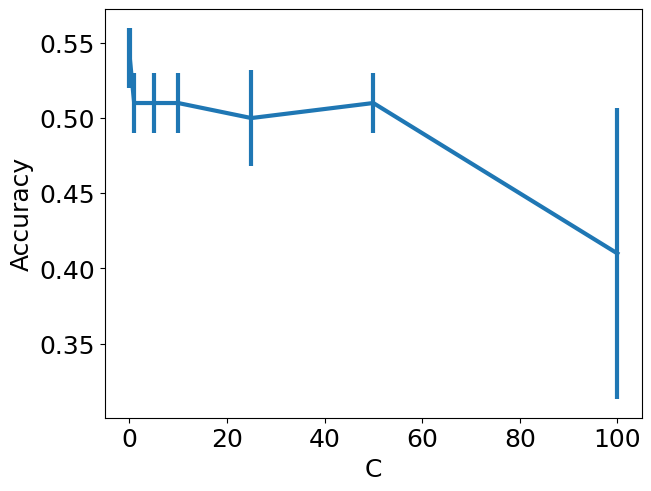

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Generate some sample data for X and y
X = np.random.rand(100, 2)
y = np.random.choice([0, 1], size=100)

# Split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

# Fit LinearSVC model
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
preds = model.predict(Xtest)

# Print confusion matrix and classification report for LinearSVC
print("Confusion Matrix for LinearSVC:")
print(confusion_matrix(ytest, preds))

print("Classification Report for LinearSVC:")
print(classification_report(ytest, preds, zero_division=1))  # Set zero_division to 1

# Fit DummyClassifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent").fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)

# Print confusion matrix and classification report for DummyClassifier
print("Confusion Matrix for DummyClassifier:")
print(confusion_matrix(ytest, ydummy))

print("Classification Report for DummyClassifier:")
print(classification_report(ytest, ydummy, zero_division=1))  # Set zero_division to 1

mean_error = []
std_error = []
C_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100]

for C in C_range:
    model = LinearSVC(C=C)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Use 'accuracy' for scoring
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(C_range, mean_error, yerr=std_error, linewidth=3)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()



ROC Curve

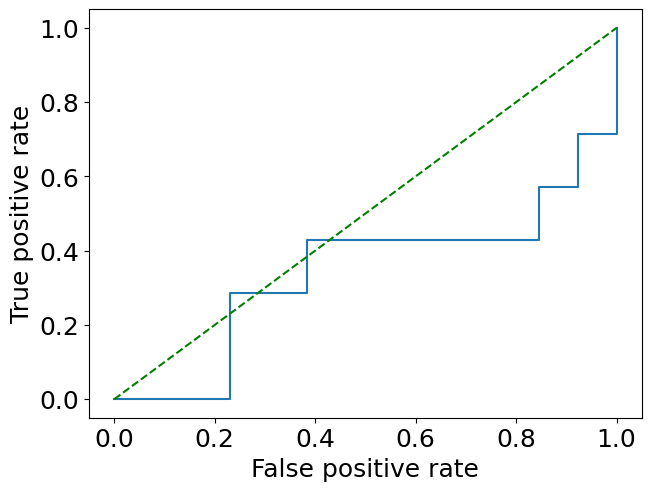

In [15]:
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,model.decision_function(Xtest))
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle='--')
plt.show()

k-Nearest Neighbour (kNN) Classifier Code

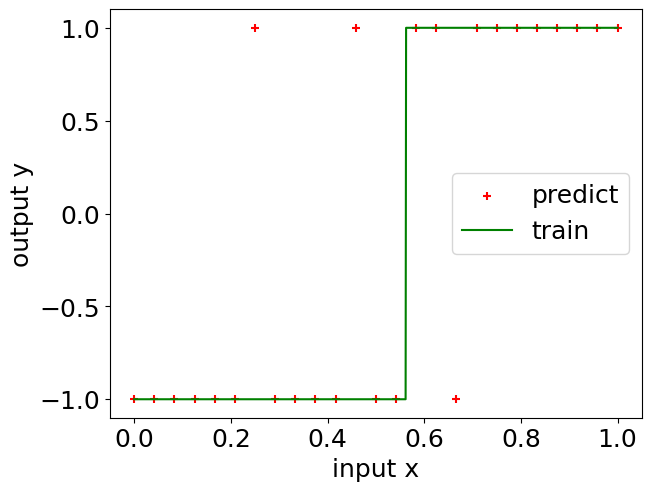

In [16]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = np.sign(Xtrain-0.5+np.random.normal(0,0.2,m))
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,weights='uniform').fit(Xtrain, ytrain)

Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

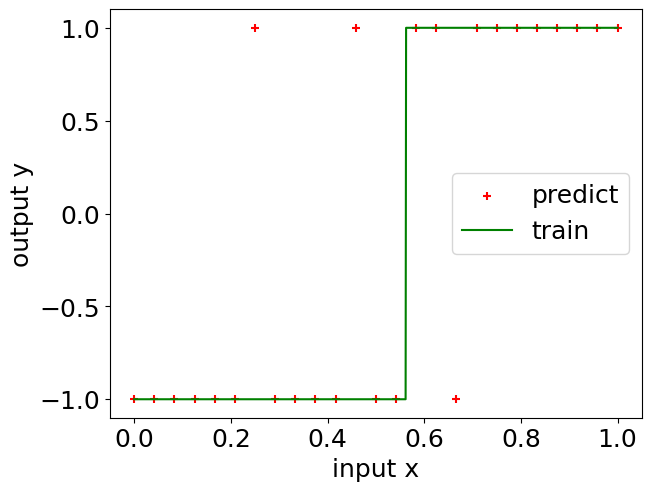

In [17]:

model = KNeighborsClassifier(n_neighbors=7,weights='uniform').fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

k-Nearest Neighbour (kNN) Regression Code

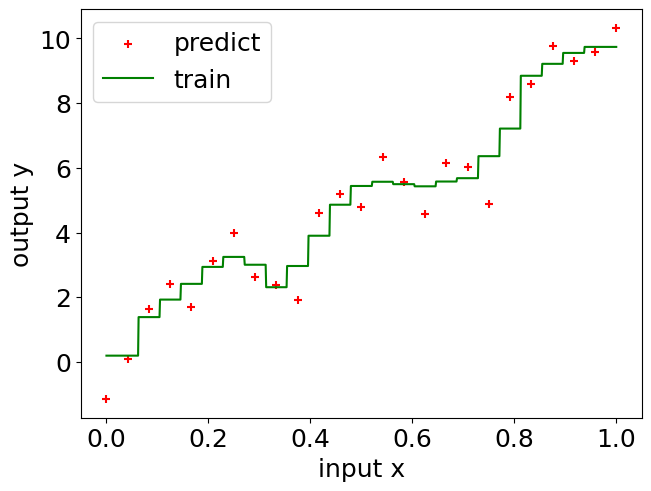

In [18]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = 10*Xtrain + np.random.normal(0.0,1.0,m)
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3,weights='uniform').fit(Xtrain, ytrain)
Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y"); plt.legend(["predict","train"])
plt.show()

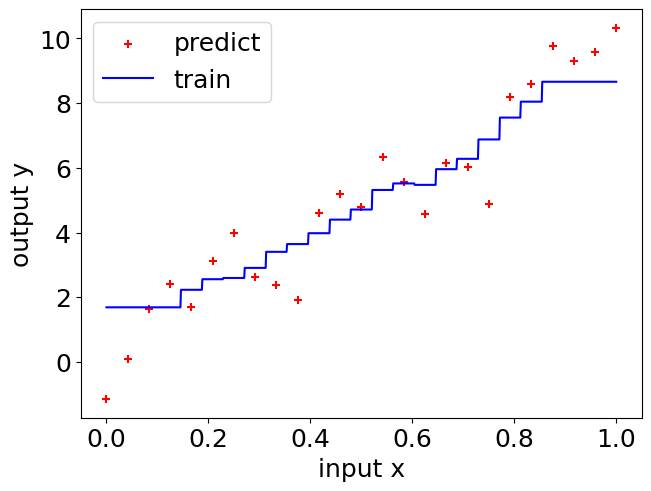

In [19]:
model2 = KNeighborsRegressor(n_neighbors=7,weights='uniform').fit(Xtrain, ytrain)
ypred2 = model2.predict(Xtest)
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred2, color='blue')
plt.xlabel("input x"); plt.ylabel("output y"); plt.legend(["predict","train"])
plt.show()

k-Nearest Neighbour (kNN) Regression Code (cont)

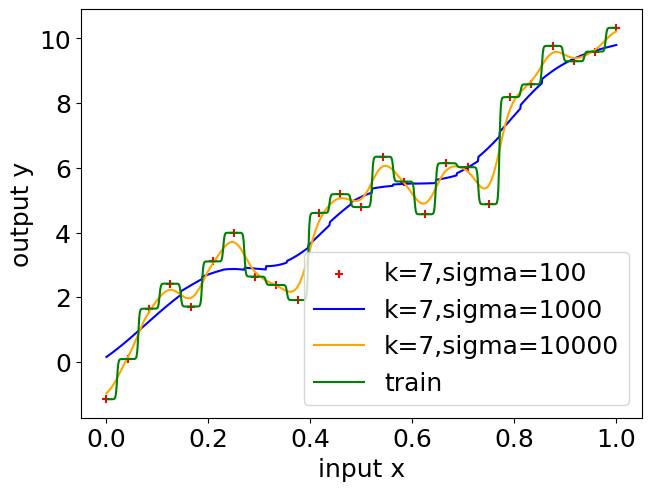

In [20]:
def gaussian_kernel100(distances):
    weights = np.exp(-100*(distances**2))
    return weights/np.sum(weights)

def gaussian_kernel1000(distances):
    weights = np.exp(-1000*(distances**2))
    return weights/np.sum(weights)

def gaussian_kernel10000(distances):
    weights = np.exp(-10000*(distances**2))
    return weights/np.sum(weights)

model2 = KNeighborsRegressor(n_neighbors=7,weights=gaussian_kernel100).fit(Xtrain, ytrain)
ypred2 = model2.predict(Xtest)
model3 = KNeighborsRegressor(n_neighbors=7,weights=gaussian_kernel1000).fit(Xtrain, ytrain)
ypred3 = model3.predict(Xtest)
model4 = KNeighborsRegressor(n_neighbors=7,weights=gaussian_kernel10000).fit(Xtrain, ytrain)
ypred4 = model4.predict(Xtest)

plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred2, color='blue')
plt.plot(Xtest, ypred3, color='orange')
plt.plot(Xtest, ypred4, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["k=7,sigma=100","k=7,sigma=1000","k=7,sigma=10000","train"])
plt.show()

Decision Tree code

|--- feature_0 <= 0.60
|   |--- feature_0 <= 0.27
|   |   |--- class: -1.0
|   |--- feature_0 >  0.27
|   |   |--- feature_0 <= 0.44
|   |   |   |--- feature_0 <= 0.35
|   |   |   |   |--- feature_0 <= 0.31
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_0 >  0.31
|   |   |   |   |   |--- class: -1.0
|   |   |   |--- feature_0 >  0.35
|   |   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.44
|   |   |   |--- feature_0 <= 0.52
|   |   |   |   |--- class: -1.0
|   |   |   |--- feature_0 >  0.52
|   |   |   |   |--- feature_0 <= 0.56
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_0 >  0.56
|   |   |   |   |   |--- class: -1.0
|--- feature_0 >  0.60
|   |--- class: 1.0



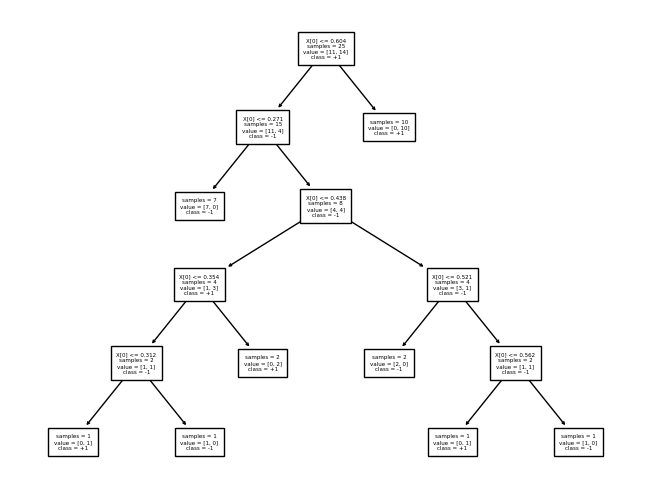

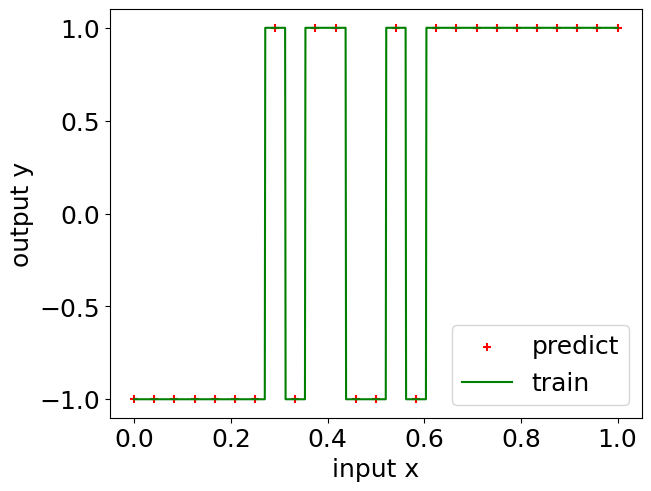

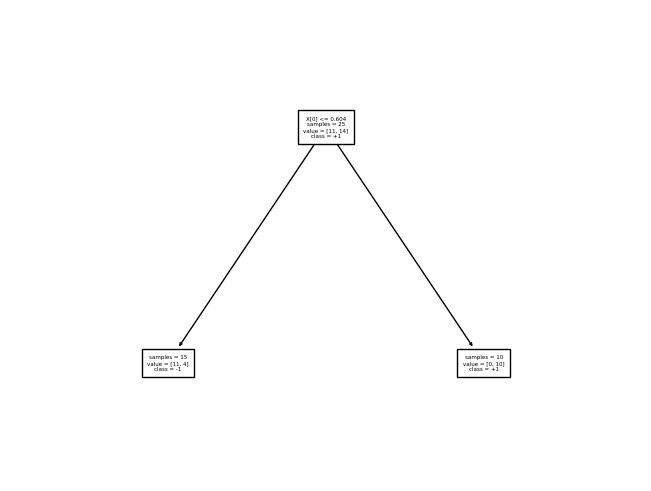

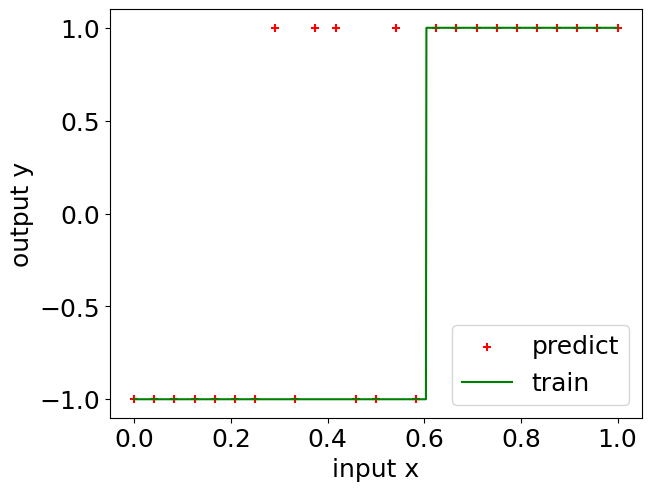

In [21]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = np.sign(Xtrain-0.5+np.random.normal(0,0.2,m))
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(Xtrain, ytrain)

Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)

from sklearn.tree import export_text
print(export_text(model))
from sklearn.tree import plot_tree
plot_tree(model, fontsize=4, impurity=False, class_names=['-1','+1'])
plt.show()

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

model = DecisionTreeClassifier(max_depth=1).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

plot_tree(model, fontsize=4, impurity=False, class_names=['-1','+1'])
plt.show()

plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

Multi-Layer Perceptron (MLP)

C 1



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum itera

C 5



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C 10



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C 100



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum itera

C 1000



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


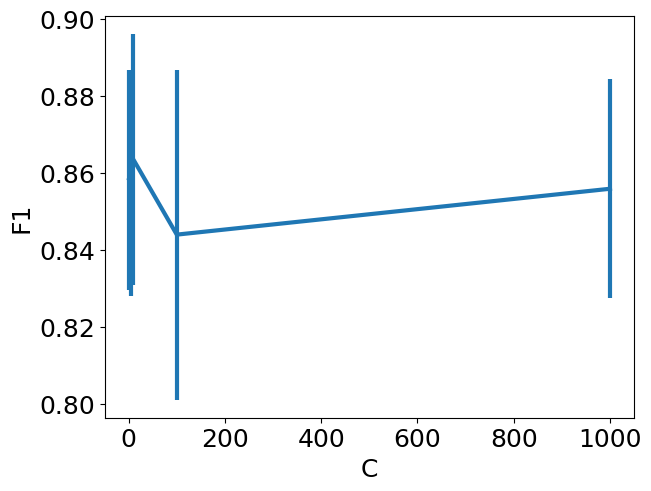

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

plt.rc('font', size=18);plt.rcParams['figure.constrained_layout.use'] = True

crossval=False
if crossval:
    mean_error=[]; std_error=[]
    hidden_layer_range = [5,10,25,50,75,100]
    for n in hidden_layer_range:
        print("hidden layer size %d\n"%n)
        model = MLPClassifier(hidden_layer_sizes=(n), max_iter=300)
        scores = cross_val_score(model, X, y, cv=5, scoring='f1')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
    plt.errorbar(hidden_layer_range,mean_error,yerr=std_error,linewidth=3)
    plt.xlabel('#hidden layer nodes'); plt.ylabel('F1')
    plt.show()

mean_error=[]; std_error=[]
C_range = [1,5,10,100,1000]
for Ci in C_range:
    print("C %d\n"%Ci)
    model = MLPClassifier(hidden_layer_sizes=(5), alpha = 1.0/Ci)
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    
plt.errorbar(C_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('C'); plt.ylabel('F1')
plt.show()

c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[87 10]
 [55 48]]
[[ 97   0]
 [103   0]]
[0 1]


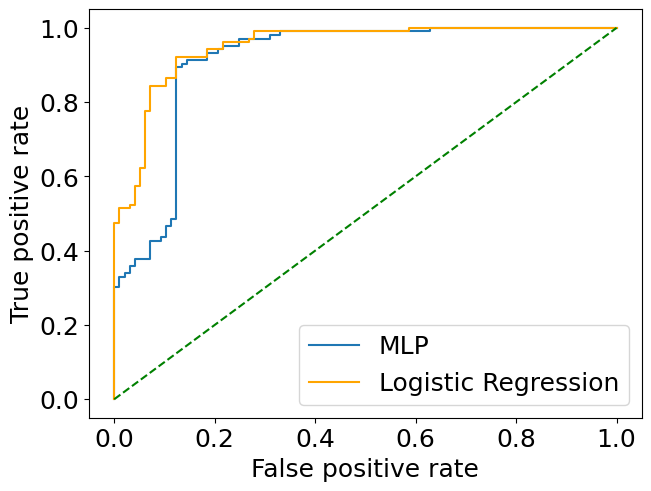

In [23]:
model = MLPClassifier(hidden_layer_sizes=(5), alpha=1.0/5).fit(Xtrain, ytrain)
preds = model.predict(Xtest)
print(confusion_matrix(ytest, preds))
dummy = DummyClassifier(strategy="most_frequent").fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print(confusion_matrix(ytest, ydummy))

from sklearn.metrics import roc_curve
preds = model.predict_proba(Xtest)
print(model.classes_)
fpr, tpr, _ = roc_curve(ytest,preds[:,1])
plt.plot(fpr,tpr)

model = LogisticRegression(C=10000).fit(Xtrain, ytrain)
fpr, tpr, _ = roc_curve(ytest,model.decision_function(Xtest))
plt.plot(fpr,tpr,color='orange')
plt.legend(['MLP','Logistic Regression'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle='--')
plt.show()

Classification Example Python Code

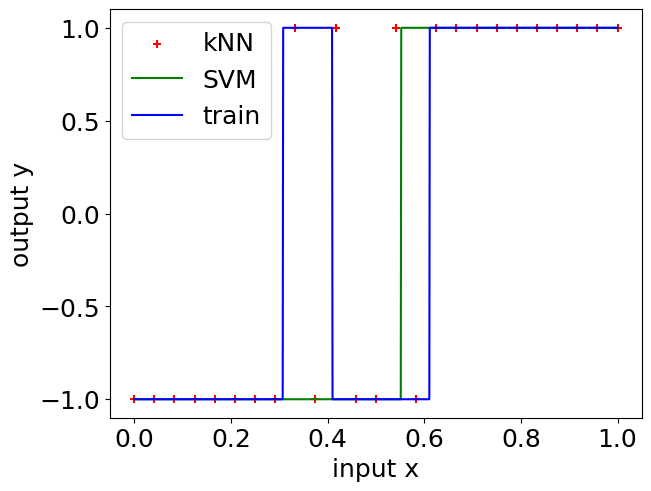

In [24]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = np.sign(Xtrain-0.5+np.random.normal(0,0.2,m))
Xtrain = Xtrain.reshape(-1, 1)

def gaussian_kernel(distances):
    weights = np.exp(-100*(distances**2))
    return weights

model = KNeighborsClassifier(n_neighbors=25,weights=gaussian_kernel).fit(Xtrain, ytrain)

Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')

from sklearn.svm import SVC
model = SVC(C=1000, kernel='rbf', gamma=50).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
plt.plot(Xtest, ypred, color='blue')

plt.xlabel("input x"); 
plt.ylabel("output y")
plt.legend(["kNN","SVM","train"])
plt.show()

Regression Example Python Code

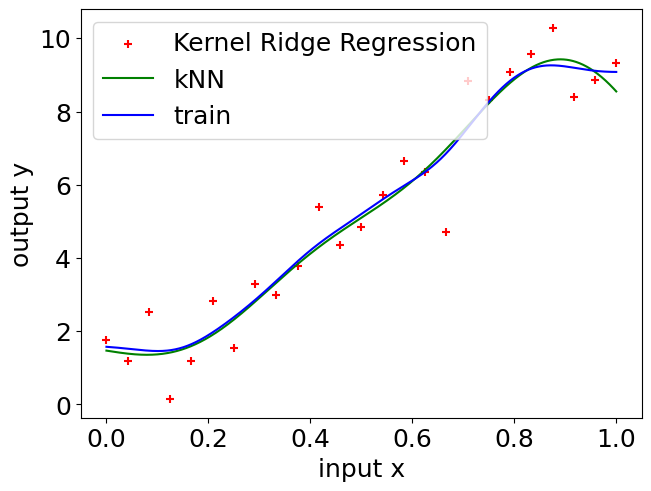

In [25]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = 10*Xtrain + np.random.normal(0.0,1.0,m)
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.kernel_ridge import KernelRidge
C = 10
model = KernelRidge(alpha=1.0/C, kernel='rbf', gamma=10).fit(Xtrain, ytrain)

Xtest = np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)

def gaussian_kernel(distances):
    weights = np.exp(-100*(distances**2))
    return weights

model2 = KNeighborsRegressor(n_neighbors=m,weights=gaussian_kernel).fit(Xtrain, ytrain)
ypred2 = model2.predict(Xtest)

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.plot(Xtest, ypred2, color='blue')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["Kernel Ridge Regression","kNN","train"])
plt.show()

Circle Example Python Code

C:\Users\M2-Winterfell\AppData\Local\Temp\ipykernel_5372\2480920344.py:13: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contour(xx,yy, ypred.reshape(xx.shape), c=ypred,cmap=plt.cm.brg, levels=2)


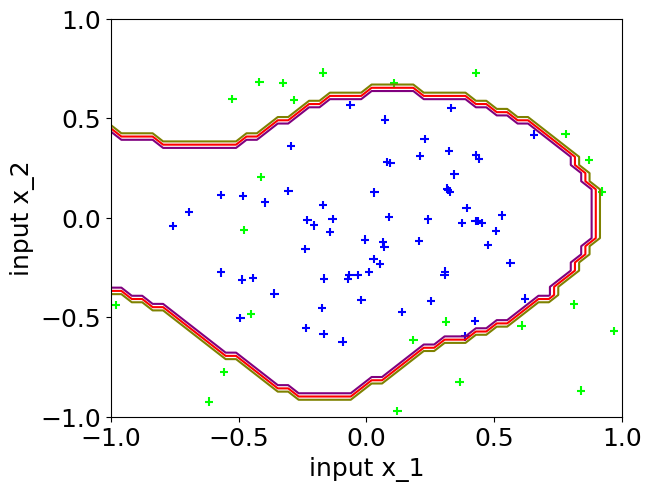

C:\Users\M2-Winterfell\AppData\Local\Temp\ipykernel_5372\2480920344.py:26: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contour(xx,yy, ypred.reshape(xx.shape), c=ypred,cmap=plt.cm.brg, levels=2)


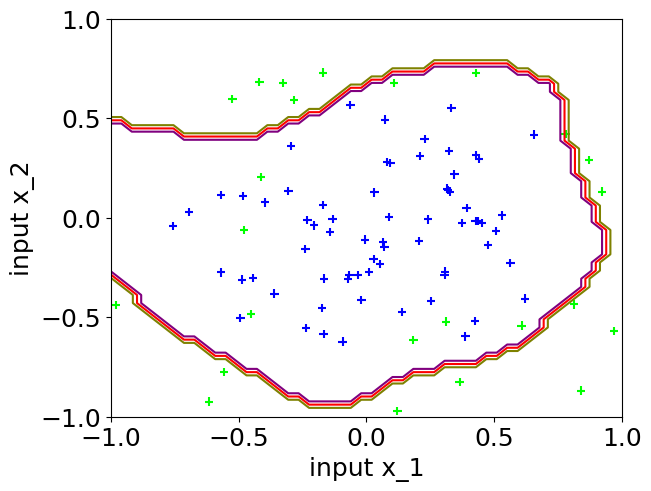

In [26]:
m = 100
Xtrain = 0.5*np.random.randn(m,2)
ytrain = np.sign((Xtrain[:,0]**2+Xtrain[:,1]**2)-0.5+np.random.normal(0,0.2,m))

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True

xx,yy = np.meshgrid(np.linspace(-1, 1, 50),np.linspace(-1, 1, 50))
Xtest = np.c_[xx.ravel(), yy.ravel()]
ytest = np.sign((xx**2+yy**2)-0.5)

model = SVC(C=1000, kernel='rbf', gamma=1).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
plt.contour(xx,yy, ypred.reshape(xx.shape), c=ypred,cmap=plt.cm.brg, levels=2)
#plt.scatter(xx,yy,marker='.',c=ypred.reshape(xx.shape),cmap=plt.cm.brg)
plt.scatter(Xtrain[:,0],Xtrain[:,1],marker='+',c=ytrain,cmap=plt.cm.brg)
plt.xlim((-1,1)); plt.ylim((-1,1))
plt.xlabel("input x_1"); plt.ylabel("input x_2")
plt.show()

def gaussian_kernel(distances):
    weights = np.exp(-10*(distances**2))
    return weights

model = KNeighborsClassifier(n_neighbors=m,weights=gaussian_kernel).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
plt.contour(xx,yy, ypred.reshape(xx.shape), c=ypred,cmap=plt.cm.brg, levels=2)
plt.scatter(Xtrain[:,0],Xtrain[:,1],marker='+',c=ytrain,cmap=plt.cm.brg)
plt.xlim((-1,1)); plt.ylim((-1,1))
plt.xlabel("input x_1"); plt.ylabel("input x_2")
plt.show()

Text Preprocessing

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M2-Winterfell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
tokenizer = CountVectorizer().build_tokenizer()
print(tokenizer("Here's example text, isn't it?"))
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize
print(WhitespaceTokenizer().tokenize("Here's example text, isn't it?"))
print(word_tokenize("Here's example text, isn't it?"))

print(tokenizer("likes liking liked"))
print(WhitespaceTokenizer().tokenize("likes liking liked"))
print(word_tokenize("likes liking liked"))

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokens = word_tokenize("Here's example text, isn't it?")
stems = [stemmer.stem(token) for token in tokens]
print(stems)

tokens = word_tokenize("likes liking liked")
stems = [stemmer.stem(token) for token in tokens]
print(stems)

['Here', 'example', 'text', 'isn', 'it']
["Here's", 'example', 'text,', "isn't", 'it?']
['Here', "'s", 'example', 'text', ',', 'is', "n't", 'it', '?']
['likes', 'liking', 'liked']
['likes', 'liking', 'liked']
['likes', 'liking', 'liked']
['here', "'s", 'exampl', 'text', ',', 'is', "n't", 'it', '?']
['like', 'like', 'like']


Python Bag of Words Example

In [29]:
docs = [
'This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names())
print(X.toarray())

['and the', 'first document', 'is the', 'is this', 'second document', 'second second', 'the first', 'the second', 'the third', 'third one', 'this is', 'this the']
[[0 1 1 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 1 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 1]]


Remove Stop Words & Rare Words

In [31]:
nltk.download('stopwords')
vectorizer = CountVectorizer(stop_words=nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M2-Winterfell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Python TF-IDF Example

In [32]:
docs = [
'This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None)
X = vectorizer.fit_transform(docs)
X_array = np.around(X.toarray(), 2)
print(vectorizer.get_feature_names())
print(X_array)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.   1.22 1.51 1.22 0.   0.   1.   0.   1.22]
 [0.   1.22 0.   1.22 0.   3.83 1.   0.   1.22]
 [1.92 0.   0.   0.   1.92 0.   1.   1.92 0.  ]
 [0.   1.22 1.51 1.22 0.   0.   1.   0.   1.22]]


Python Code For Recommending News Articles

In [34]:
# Load the entire CSV file
#df = pd.read_csv("articles1.csv")

# Extract the first 1000 rows
#df_first_1000 = df.head(1000)

# Save the extracted data to a new CSV file
#df_first_1000.to_csv("articles1_1000.csv", index=False)


In [35]:
# first 1000 articles from news dataset at https://www.kaggle.com/snapcrack/all−the−news
text = pd.read_csv('articles1_1000.csv')
text.head()

x = text['content']
vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.2)
X = vectorizer.fit_transform(x)
indices = np.arange(x.size)

train, test = train_test_split(indices, test_size=0.2)

from sklearn.metrics.pairwise import cosine_distances
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3,metric=cosine_distances).fit(X[train])

test=[test[0]]
found = nbrs.kneighbors(X[test], return_distance=False)

test_i=0
print('text:\n%.300s'%x[test[test_i]])
for i in found[0]:
    print('match %d:\n%.300s'%(i,x[train[i]]))

text:
WASHINGTON  —   One topic has dominated conversations among elected Republicans since President Trump’s stunning victory: Will he actually pursue his campaign agenda of   nationalism, all but obliterating the   distinctions that have defined America’s political parties for a century? While some of h
match 410:
WASHINGTON  —   It’s   or   time for Republicans. After a tumultuous decade that has seen profound changes in the makeup and character of their party, Republicans are poised to complete their slow but steady climb back to power as they seize control of the House, Senate and the White House for the f
match 642:
BERLIN  —   Germany’s highest court rejected on Tuesday an attempt to ban the National Democratic Party, the country’s oldest   political organization, finding that it did not pose a danger to democracy even though its principles violate the Constitution. The ruling by the Federal Constitutional Cou
match 468:
PHILADELPHIA  —   From the time Donald J. Trump became the

Python Code For Bike Example

In [ ]:
import math, sys
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True

# read data. column 1 is date/time, col 6 is #bikes
df = pd.read_csv("herbert.csv", usecols = [1,6], parse_dates=[1])
#print(df.head())

# 3rd Feb 2020 is a monday, 10th is following monday
start=pd.to_datetime("04-02-2020",format='%d-%m-%Y')
end=pd.to_datetime("14-03-2020",format='%d-%m-%Y')

# convert date/time to unix timestamp in sec
t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
dt = t_full[1]-t_full[0]
print("data sampling interval is %d secs"%dt)

# extract data between start and end dates
t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000
t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
t=(t-t[0])/60/60/24 # convert timestamp to days
y = np.extract([(t_full>=t_start) & (t_full<=t_end)], df.iloc[:,1]).astype(np.int64)
#plot extracted data
#plt.scatter(t,y, color='red', marker='.'); plt.show()

def test_preds(q,dd,lag,plot):
    #q-step ahead prediction
    stride=1
    XX=y[0:y.size-q-lag*dd:stride]
    for i in range(1,lag):
        X=y[i*dd:y.size-q-(lag-i)*dd:stride]
        XX=np.column_stack((XX,X))
    yy=y[lag*dd+q::stride]; tt=t[lag*dd+q::stride]

    train, test = train_test_split(np.arange(0,yy.size),test_size=0.2)
    model = Ridge(fit_intercept=False).fit(XX[train], yy[train])
    print(model.intercept_, model.coef_)
    if plot:
        y_pred = model.predict(XX)
        plt.scatter(t, y, color='black'); plt.scatter(tt, y_pred, color='blue')
        plt.xlabel("time (days)"); plt.ylabel("#bikes")
        plt.legend(["training data","predictions"],loc='upper right')
        day=math.floor(24*60*60/dt) # number of samples per day
        plt.xlim(((lag*dd+q)/day,(lag*dd+q)/day+2))
        plt.show()

# prediction using short-term trend
plot=True
test_preds(q=10,dd=1,lag=3,plot=plot)

# prediction using daily seasonality
d=math.floor(24*60*60/dt) # number of samples per day
test_preds(q=d,dd=d,lag=3,plot=plot)

# prediction using weekly seasonality
w=math.floor(7*24*60*60/dt) # number of samples per day
test_preds(q=w,dd=w,lag=3,plot=plot)

#putting it together
q=10
lag=3; stride=1
w=math.floor(7*24*60*60/dt) # number of samples per week
len = y.size-w-lag*w-q
XX=y[q:q+len:stride]
for i in range(1,lag):
    X=y[i*w+q:i*w+q+len:stride]
    XX=np.column_stack((XX,X))
d=math.floor(24*60*60/dt) # number of samples per day
for i in range(0,lag):
    X=y[i*d+q:i*d+q+len:stride]
    XX=np.column_stack((XX,X))
for i in range(0,lag):
    X=y[i:i+len:stride]
    XX=np.column_stack((XX,X))
yy=y[lag*w+w+q:lag*w+w+q+len:stride]
tt=t[lag*w+w+q:lag*w+w+q+len:stride]

train, test = train_test_split(np.arange(0,yy.size),test_size=0.2)
#train = np.arange(0,yy.size)
model = Ridge(fit_intercept=False).fit(XX[train], yy[train])
print(model.intercept_, model.coef_)

if plot:
    y_pred = model.predict(XX)
    plt.scatter(t, y, color='black'); plt.scatter(tt, y_pred, color='blue')
    plt.xlabel("time (days)"); plt.ylabel("#bikes")
    plt.legend(["training data","predictions"],loc='upper right')
    day=math.floor(24*60*60/dt) # number of samples per day
    plt.xlim((4*7,4*7+4))
    plt.show()